# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units="Imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_pd=pd.read_csv("../output_data/cities.csv")
cities_pd.head()

lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding latitudes and longtitudes and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
 

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_pd=pd.DataFrame({'City': cities, 'Cloudiness': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})
cities_pd.head()

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,mooi river,,,,,,,
1,evansville,,,,,,,
2,pontes e lacerda,,,,,,,
3,attawapiskat,,,,,,,
4,dikson,,,,,,,


In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
query_url = f"{base_url}appid={weather_api_key}&units={temp_units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=3796d9507516315ec2ebdc39473cc6ea&units=Imperial&q='

In [5]:
cities1 = []
cloudiness1 = []
date1 = []
humidity1 = []
lat1 = []
lng1 = []
max_temp1 = []
wind_speed1 = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness1.append(response['clouds']['all'])
        date1.append(response['dt'])
        humidity1.append(response['main']['humidity'])
        lat1.append(response['coord']['lat'])
        lng1.append(response['coord']['lon'])
        max_temp1.append(response['main']['temp_max'])
        wind_speed1.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            cities1.append(city)
        else:
            count_one += 1
            cities1.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | evansville
Processing Record 2 of Set 1 | pontes e lacerda
City not found. Skipping...
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | pahrump
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | harper
City not found. Skipping...
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | saskylakh
Processing Record 10 of Set 1 | cancun
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | flinders
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | uberaba
Processing Record 16 of Set 1 | mys shmidta
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 20 of Set 1 | apiai
City not found. Skipping...
City not found. Skipping...
Processing Re

Processing Record 39 of Set 4 | avera
Processing Record 40 of Set 4 | san cristobal
City not found. Skipping...
Processing Record 41 of Set 4 | mgandu
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | cam ranh
City not found. Skipping...
Processing Record 44 of Set 4 | talas
Processing Record 45 of Set 4 | codrington
City not found. Skipping...
Processing Record 46 of Set 4 | port elizabeth
City not found. Skipping...
Processing Record 47 of Set 4 | coihaique
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | merke
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | berbera
Processing Record 3 of Set 5 | paamiut
Processing Record 4 of Set 5 | esil
City not found. Skipping...
Processing Record 5 of Set 5 | santa cruz de tenerife
Processing Record 6 of Set 5 | iracoubo
Processing Record 7 of Set 5 | carlos chagas
Processing Record 8 of Set 5 | tefe
Processing Record 9 of Set 5 | aksarka
Processing Record 10 of Set 5 | 

Processing Record 27 of Set 8 | diamantino
Processing Record 28 of Set 8 | calhoun
Processing Record 29 of Set 8 | skjervoy
Processing Record 30 of Set 8 | umba
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 31 of Set 8 | lima
Processing Record 32 of Set 8 | severobaykalsk
Processing Record 33 of Set 8 | cap malheureux
Processing Record 34 of Set 8 | manta
Processing Record 35 of Set 8 | batagay-alyta
Processing Record 36 of Set 8 | andujar
Processing Record 37 of Set 8 | progreso
Processing Record 38 of Set 8 | margate
Processing Record 39 of Set 8 | grindavik
Processing Record 40 of Set 8 | winslow
Processing Record 41 of Set 8 | bowen
Processing Record 42 of Set 8 | lyuban
Processing Record 43 of Set 8 | usinsk
Processing Record 44 of Set 8 | takahashi
Processing Record 45 of Set 8 | calnali
Processing Record 46 of Set 8 | zabid
Processing Record 47 of Set 8 | lagos
Process

In [6]:
### Convert Raw Data to DataFrame
weather_dict = {
    "City":cities1,
    "Cloudiness":cloudiness1,
    "Date":date1,
    "Humidity":humidity1,
    "Lat":lat1,
    "Lng":lng1,
    "Max Temp":max_temp1,
    "Wind Speed":wind_speed1}

weather_df=pd.DataFrame(weather_dict)

#Export the city data into a .csv.
weather_df.to_csv("City_Weather_Data.csv", index=False, header=True)

#Display the DataFrame
weather_df.head(10)

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,evansville,1,1619791674,52,37.9748,-87.5558,66.00,5.75
1,pontes e lacerda,75,1619791845,70,-4.8333,-43.3667,86.00,6.91
2,dikson,81,1619791635,94,73.5069,80.5464,13.46,10.11
3,jamestown,90,1619791257,87,42.0970,-79.2353,44.60,17.27
4,pahrump,1,1619791682,20,36.2083,-115.9839,68.00,5.75
5,yulara,53,1619791846,25,-25.2406,130.9889,64.40,6.91
6,harper,100,1619791846,68,4.3750,-7.7169,84.99,6.04
7,ushuaia,75,1619791540,87,-54.8000,-68.3000,39.20,3.09
8,saskylakh,100,1619791587,88,71.9167,114.0833,33.51,9.48
9,cancun,75,1619791638,62,21.1743,-86.8466,86.00,13.80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
def Q25(x):
    return x.quantile(0.25)
def Q50(y):
    return y.quantile(0.50)
def Q75(z):
    return z.quantile(0.75)

weather_df.agg({"Lat": ["count", "mean", "std","min",Q25,Q50,Q75,"max"],
               "Lng": ["count", "mean", "std","min",Q25,Q50,Q75,"max"],
                "Max Temp": ["count", "mean", "std","min",Q25,Q50,Q75,"max"],           
                "Humidity": ["count", "mean", "std","min",Q25,Q50,Q75,"max"],
                "Cloudiness": ["count", "mean", "std","min",Q25,Q50,Q75,"max"],
                "Wind Speed": ["count", "mean", "std","min",Q25,Q50,Q75,"max"],
                "Date": ["count", "mean", "std","min",Q25,Q50,Q75,"max"]})

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,22.742960,22.958811,63.565255,64.102190,54.027372,8.138066,1.619792e+09
std,31.896403,86.584619,20.709475,23.742998,38.979219,5.440664,1.852791e+02
min,-54.800000,-179.166700,-1.440000,2.000000,0.000000,0.600000,1.619791e+09
Q25,-3.338525,-49.753825,50.000000,50.750000,17.000000,4.290000,1.619792e+09
Q50,29.416400,22.431350,65.335000,67.500000,65.500000,6.910000,1.619792e+09
Q75,48.037450,98.693100,78.800000,82.000000,91.250000,10.587500,1.619792e+09
max,78.218600,179.316700,109.130000,100.000000,100.000000,34.520000,1.619792e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.

humidity_df=weather_df[(weather_df['Humidity']>100)]
humidity_df.head()


,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

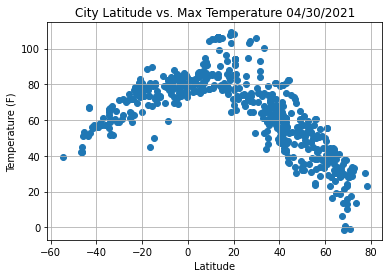

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

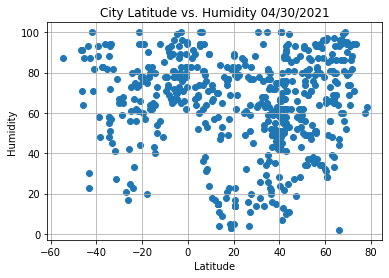

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

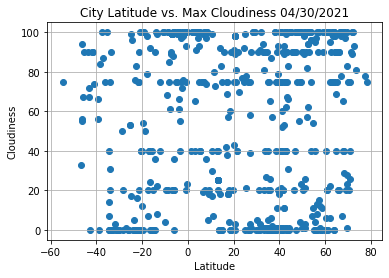

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

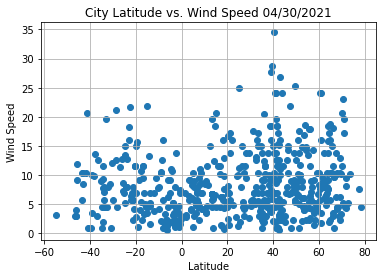

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere data frame.
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.01x + 100.46
The r-value is: -0.8646178014320952


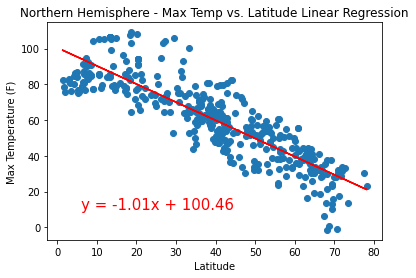

In [27]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.64x + 83.29
The r-value is: 0.7882619222560044


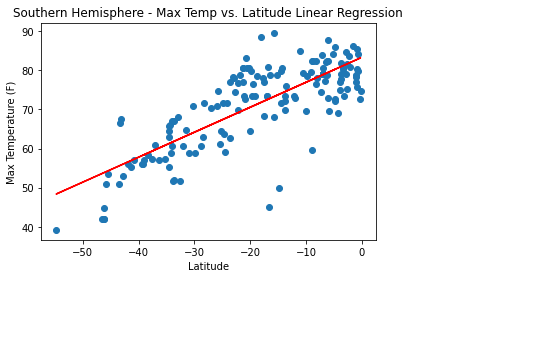

In [28]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21406934355884136


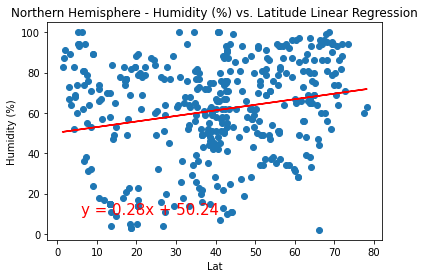

In [30]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.2x + 75.52
The r-value is: 0.15461678915247193


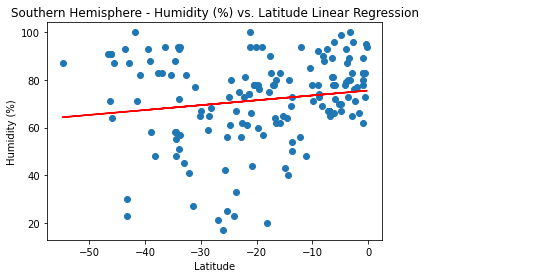

In [31]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 46.4
The r-value is: 0.08822208344320555


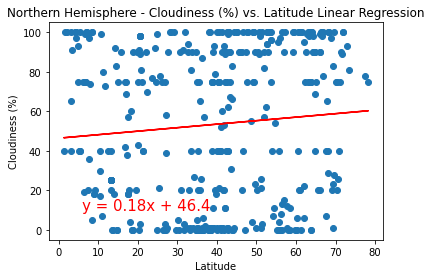

In [32]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.85x + 71.71
The r-value is: 0.2978306423186855


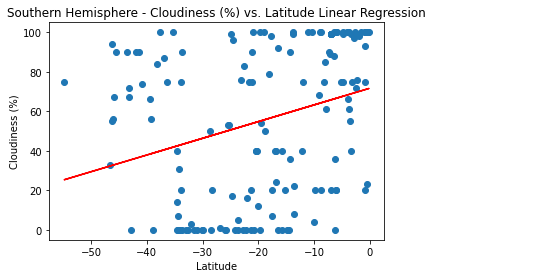

In [33]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.27207334567733227


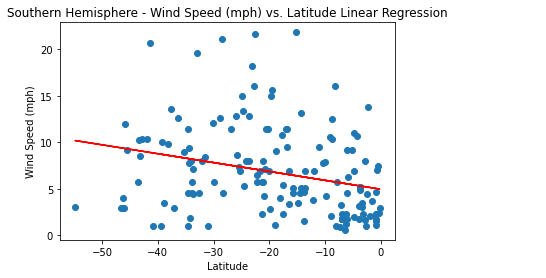

In [34]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.27207334567733227


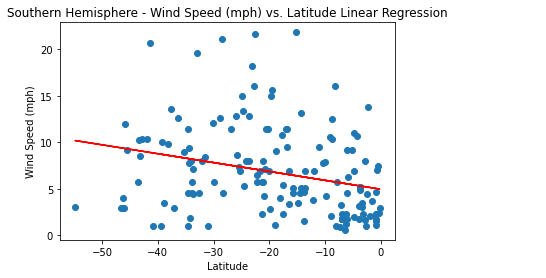

In [36]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-value is: {rvalue}")

plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

plt.show()